In [1]:
#!pip install graphviz --user
#!echo $PYTHONPATH
#!ls -ltr /eos/user/n/nmangane/.local/lib/python2.7/site-packages/
#!export PATH=/eos/user/n/nmangane/.local/lib/python2.7/site-packages/:$PATH
#!ls -ltr | grep .root
#!xrdcp root://cms-xrd-Eglobal.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/2A0100C0-5A95-0145-B62F-0CA9D9639F68.root fuckoff.root

In [2]:
from __future__ import print_function
import os, time
import ROOT
import collections
from IPython.display import Image, display, SVG
#import graphviz

useSpark = False
if useSpark:
    import PyRDF
    PyRDF.use("spark", {'npartitions': '64'}) #was 32 in example
    #PyRDF.use("local")
    RDF = PyRDF.RDataFrame
else:
    ROOT.ROOT.EnableImplicitMT()
    RS = ROOT.ROOT
    RDF = RS.RDataFrame


Welcome to JupyROOT 6.21/01


In [3]:
#FIXME: Need filter efficiency calculated for single lepton generator filtered sample. First approximation will be from MCCM (0.15) but as seen before, it's not ideal. 
#May need to recalculate using genWeight/sumWeights instead of sign(genWeight)/(nPositiveEvents - nNegativeEvents), confirm if there's any difference.
lumi = {"2017": 41.53,
        "2018": 1}
era = "2017"
leg_dict = {"ttbar_DL-GF": ROOT.kAzure-2,
            "ttbar_DL": ROOT.kRed,
            "ttbar_SL-GF": ROOT.kYellow,
            "ttbar_SL": ROOT.kCyan,
           }
source_DL_V2 = {
    "tt_DL":{
        "era": "2017",
        "isData": False,
        "nEvents": 69098644,
        "nEventsPositive": 68818780,
        "nEventsNegative": 279864,
        "sumWeights": 4980769113.241218,
        "sumWeights2": 364913493679.955078,
        "isSignal": False,
        "crossSection": 89.0482,
        "color": leg_dict["ttbar_DL"],
        "sourceStitching": ["FilesStitching/2A0100C0-5A95-0145-B62F-0CA9D9639F68_DL.root",
                       "FilesStitching/4ADB829B-0293-0D48-8AEA-31AAFD1936B8_DL.root",
                       "FilesStitching/FF239AE9-D713-5147-BB2C-FAFF45770541_DL.root",
                       "FilesStitching/FEFFCB04-A0CD-2945-BB46-D0D9013CD4F4_DL.root",
                       "FilesStitching/FB37F4B8-4878-AC41-80AD-1AC7BCC96FBF_DL.root",
                       "FilesStitching/F86F8AAA-A400-7340-A1B2-1BEDDD5C634C_DL.root",
                       "FilesStitching/F61A315A-0C50-F545-9D27-5821F2A16665_DL.root",
                       "FilesStitching/E8AEC963-FB46-604E-BFCA-4BAD27E9C457_DL.root",
                       "FilesStitching/E5D51928-D702-3B4E-93FF-10B011657478_DL.root",
                       "FilesStitching/E08462B0-0C0E-E54F-BFC6-8B09D73ABD59_DL.root",
                       "FilesStitching/DE610AC6-52C8-F243-B726-266E986C67C7_DL.root",
                       "FilesStitching/DC5D2C4D-0FA1-9448-BDAD-8B3212A417AC_DL.root",
                       "FilesStitching/DB9DB17D-00F1-C540-BF6A-0A3314CD31F7_DL.root",
                       "FilesStitching/DB2F7B58-0EFA-B241-B52A-8A14E3DC5356_DL.root",
                       "FilesStitching/DB097816-5864-3640-A472-37E4518131AD_DL.root",
                       "FilesStitching/D8B47A61-B47A-494C-B6B7-E2BE3F250C9E_DL.root",
                       "FilesStitching/D3582719-8222-9A48-8FD6-FE7CA90C10F2_DL.root",
                       "FilesStitching/CD496386-C278-0C4C-8F7E-BE62903ADD57_DL.root",
                       "FilesStitching/CAACE0A1-EA68-154E-8F4E-2D2298D087ED_DL.root",
                       "FilesStitching/C805AA80-6F12-E84C-B5F6-6AC7CDBDD568_DL.root",
                       "FilesStitching/C329E2BB-0C74-A640-9F7B-DFC5505DA4A9_DL.root",
                       "FilesStitching/C2DFBA51-FCE3-954D-B2FD-050DCF3BA2AE_DL.root",
                       "FilesStitching/C0CFCDB9-4C19-9243-B1F5-4CC8B34A5F53_DL.root",
                       "FilesStitching/B8C82709-DAFE-DE46-8207-ECB035DBE32C_DL.root",
                       "FilesStitching/B5A0D925-E6D2-964F-8FBF-B6DCF8311983_DL.root",
                       "FilesStitching/B40D0E48-C30F-144C-954D-C79F2E74BAC0_DL.root",
                       "FilesStitching/B1C73F9C-E932-E148-8178-AC2E912F77C7_DL.root",
                       "FilesStitching/B0CDDA70-01A8-DA47-A6DA-7E518609D349_DL.root",
                       "FilesStitching/A65E69A8-4F9A-6B4B-889E-787546455F50_DL.root",
                       "FilesStitching/A1ACAB6F-3CE4-8E4B-A148-5CFB78AAB153_DL.root",
                       "FilesStitching/9D587515-51E3-FB41-856E-41406CF1AA94_DL.root",
                       "FilesStitching/9C4ECF47-F241-E841-9017-524C3FE3F782_DL.root",
                       "FilesStitching/99E411C5-8086-3C41-B5E0-8356B93A62AE_DL.root",
                       "FilesStitching/9826D66E-2230-9A4E-AF59-99404C9CA0F8_DL.root",
                       "FilesStitching/96EA0AD0-7850-9742-800B-8732972FE897_DL.root",
                       "FilesStitching/96787088-4414-194C-9045-CB7B81923664_DL.root",
                       "FilesStitching/93648D0C-3759-5A4F-890B-5275C66BC423_DL.root",
                       "FilesStitching/8A267C63-CC35-3D49-9AA9-1D5E89C3FA8A_DL.root",
                       "FilesStitching/854ACC40-D83A-CB4D-8096-A3D5AB0CCEB7_DL.root",
                       "FilesStitching/8482B4BA-D619-CA42-92B8-D8AC7EE3E14A_DL.root",
                       "FilesStitching/824DD978-02EE-8540-84F4-45C81D901868_DL.root",
                       "FilesStitching/73C3619B-A47F-1D49-B4EC-E347B144C067_DL.root",
                       "FilesStitching/7027E474-2CF4-354C-928D-26A03AC64602_DL.root",
                       "FilesStitching/6974B155-E6FB-6046-8CF0-861DD75C65E9_DL.root",
                       "FilesStitching/67897CF3-3F11-AC48-9CB2-926BF1CF2088_DL.root",
                       "FilesStitching/66B78AE0-D4B0-A04D-B103-DB78ACC047E7_DL.root",
                       "FilesStitching/6530E34B-0886-6C41-A78A-74B945B9E23E_DL.root",
                       "FilesStitching/63BA2496-580D-CE4A-A9D5-FC81E299FEAC_DL.root",
                       "FilesStitching/5BB4B096-AC3F-BD49-B599-D43E0176890F_DL.root",
                       "FilesStitching/5AEEEC98-7170-114E-B4FF-FA3F9BDC3217_DL.root",
                       "FilesStitching/5A8E9758-665D-264D-9ACF-A7C69D56523B_DL.root",
                       "FilesStitching/55B03D69-AE5B-6142-80A6-1517F2B9F6CC_DL.root",
                       "FilesStitching/54EC1465-9EDA-7B40-8042-1FD34081497A_DL.root",
                       "FilesStitching/51640F96-C070-694F-A3EA-59507F27FA3B_DL.root",
                       "FilesStitching/33B12362-B2B9-2D46-ADBF-8BB30E9949B0_DL.root",
                       "FilesStitching/2C64BBC9-4082-424C-81F2-D0ED3406CBC9_DL.root",
                       "FilesStitching/52B5612E-888D-FA4C-8C83-C60104F70DD3_DL.root",
                       "FilesStitching/544DB558-0C6F-EC41-BFDC-B6EE46EC986F_DL.root",
                       "FilesStitching/46239DBE-8E5E-9744-B7F4-B72B44803619_DL.root",
                       "FilesStitching/460F269F-337C-7F4F-92FD-5A18525B33F8_DL.root",
                       "FilesStitching/42D378EC-A09E-C945-99C7-BC1F00E41D88_DL.root",
                       "FilesStitching/4179956C-6AC8-7041-AC46-DC2DE881F788_DL.root",
                       "FilesStitching/3992DEA8-A6A0-F946-9563-1FA0AACC9A0C_DL.root",
                       "FilesStitching/38E81C59-132D-6847-B0D8-77A1D0D5ED56_DL.root",
                       "FilesStitching/1663D9BD-F7FA-784B-A313-D540068B4BAB_DL.root",
                       "FilesStitching/14F0276E-7349-2741-9186-B5713E7EBEA8_DL.root",
                       "FilesStitching/0AA9D783-4D4C-924A-9B92-709702ED7915_DL.root",
                       "FilesStitching/03263E02-B201-3540-BE86-03A3DFF898F2_DL.root",
                       "FilesStitching/0010502D-08FD-9A45-9B8F-A2FB501C776D_DL.root",
                       "FilesStitching/1930F644-A4DF-9441-BCDE-48B2D6045607_DL.root",
                       "FilesStitching/1BE985E2-0F6A-7B4D-98D8-A5CC8BDF64C0_DL.root",
                       "FilesStitching/1C71F860-D8D2-E342-9FA3-A4815ABD60EA_DL.root",
                       "FilesStitching/27A7A157-10B1-024C-AD51-53D05797FB47_DL.root",],
        "source": "root://eoshome-n.cern.ch/eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-1_2017_v2.root",
        "sourceSPARK": ["root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/2A0100C0-5A95-0145-B62F-0CA9D9639F68.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/4ADB829B-0293-0D48-8AEA-31AAFD1936B8.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/FF239AE9-D713-5147-BB2C-FAFF45770541.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/FEFFCB04-A0CD-2945-BB46-D0D9013CD4F4.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/FB37F4B8-4878-AC41-80AD-1AC7BCC96FBF.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/F86F8AAA-A400-7340-A1B2-1BEDDD5C634C.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/F61A315A-0C50-F545-9D27-5821F2A16665.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/E8AEC963-FB46-604E-BFCA-4BAD27E9C457.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/E5D51928-D702-3B4E-93FF-10B011657478.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/E08462B0-0C0E-E54F-BFC6-8B09D73ABD59.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/DE610AC6-52C8-F243-B726-266E986C67C7.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/DC5D2C4D-0FA1-9448-BDAD-8B3212A417AC.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/DB9DB17D-00F1-C540-BF6A-0A3314CD31F7.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/DB2F7B58-0EFA-B241-B52A-8A14E3DC5356.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/DB097816-5864-3640-A472-37E4518131AD.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/D8B47A61-B47A-494C-B6B7-E2BE3F250C9E.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/D3582719-8222-9A48-8FD6-FE7CA90C10F2.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/CD496386-C278-0C4C-8F7E-BE62903ADD57.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/CAACE0A1-EA68-154E-8F4E-2D2298D087ED.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/C805AA80-6F12-E84C-B5F6-6AC7CDBDD568.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/C329E2BB-0C74-A640-9F7B-DFC5505DA4A9.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/C2DFBA51-FCE3-954D-B2FD-050DCF3BA2AE.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/C0CFCDB9-4C19-9243-B1F5-4CC8B34A5F53.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/B8C82709-DAFE-DE46-8207-ECB035DBE32C.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/B5A0D925-E6D2-964F-8FBF-B6DCF8311983.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/B40D0E48-C30F-144C-954D-C79F2E74BAC0.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/B1C73F9C-E932-E148-8178-AC2E912F77C7.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/B0CDDA70-01A8-DA47-A6DA-7E518609D349.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/A65E69A8-4F9A-6B4B-889E-787546455F50.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/A1ACAB6F-3CE4-8E4B-A148-5CFB78AAB153.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/9D587515-51E3-FB41-856E-41406CF1AA94.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/9C4ECF47-F241-E841-9017-524C3FE3F782.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/99E411C5-8086-3C41-B5E0-8356B93A62AE.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/9826D66E-2230-9A4E-AF59-99404C9CA0F8.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/96EA0AD0-7850-9742-800B-8732972FE897.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/96787088-4414-194C-9045-CB7B81923664.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/93648D0C-3759-5A4F-890B-5275C66BC423.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/8A267C63-CC35-3D49-9AA9-1D5E89C3FA8A.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/854ACC40-D83A-CB4D-8096-A3D5AB0CCEB7.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/8482B4BA-D619-CA42-92B8-D8AC7EE3E14A.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/824DD978-02EE-8540-84F4-45C81D901868.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/73C3619B-A47F-1D49-B4EC-E347B144C067.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/7027E474-2CF4-354C-928D-26A03AC64602.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/6974B155-E6FB-6046-8CF0-861DD75C65E9.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/67897CF3-3F11-AC48-9CB2-926BF1CF2088.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/66B78AE0-D4B0-A04D-B103-DB78ACC047E7.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/6530E34B-0886-6C41-A78A-74B945B9E23E.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/63BA2496-580D-CE4A-A9D5-FC81E299FEAC.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/5BB4B096-AC3F-BD49-B599-D43E0176890F.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/5AEEEC98-7170-114E-B4FF-FA3F9BDC3217.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/5A8E9758-665D-264D-9ACF-A7C69D56523B.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/55B03D69-AE5B-6142-80A6-1517F2B9F6CC.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/54EC1465-9EDA-7B40-8042-1FD34081497A.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/51640F96-C070-694F-A3EA-59507F27FA3B.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/33B12362-B2B9-2D46-ADBF-8BB30E9949B0.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/2C64BBC9-4082-424C-81F2-D0ED3406CBC9.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/52B5612E-888D-FA4C-8C83-C60104F70DD3.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/544DB558-0C6F-EC41-BFDC-B6EE46EC986F.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/46239DBE-8E5E-9744-B7F4-B72B44803619.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/460F269F-337C-7F4F-92FD-5A18525B33F8.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/42D378EC-A09E-C945-99C7-BC1F00E41D88.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/4179956C-6AC8-7041-AC46-DC2DE881F788.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/3992DEA8-A6A0-F946-9563-1FA0AACC9A0C.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/38E81C59-132D-6847-B0D8-77A1D0D5ED56.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/1663D9BD-F7FA-784B-A313-D540068B4BAB.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/14F0276E-7349-2741-9186-B5713E7EBEA8.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/0AA9D783-4D4C-924A-9B92-709702ED7915.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/03263E02-B201-3540-BE86-03A3DFF898F2.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/0010502D-08FD-9A45-9B8F-A2FB501C776D.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/1930F644-A4DF-9441-BCDE-48B2D6045607.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/1BE985E2-0F6A-7B4D-98D8-A5CC8BDF64C0.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/1C71F860-D8D2-E342-9FA3-A4815ABD60EA.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_new_pmx_102X_mc2017_realistic_v7-v1/110000/27A7A157-10B1-024C-AD51-53D05797FB47.root",
        ],
        "stitch": {"mode": 'Flag', "condition": 'Fail', "channel": 'DL'}
        },
    "tt_DL-GF":{
        "era": "2017",
        "isData": False,
        "nEvents": 8510388,
        "nEventsPositive": 8467543,
        "nEventsNegative": 42845,
        "sumWeights": 612101836.284397,
        "sumWeights2": 44925503249.097206,
        "isSignal": False,
        "crossSection": 89.0482, #1.4705, #After applying filter efficiency...
        "color": leg_dict["ttbar_DL-GF"],
        "sourceStitching": ["FilesStitching/F600BA86-6C79-F14E-843F-A18E5A82DD01_DL-GF.root",
                       "FilesStitching/536EBC00-F7F9-B140-AEDC-ADE2B39AC3FA_DL-GF.root",
                       "FilesStitching/464A3326-28B7-EC4D-834A-F9B8B826CA0A_DL-GF.root",
                       "FilesStitching/3E4CF0E5-D1E3-BD48-AA6B-5E4549BE0B1B_DL-GF.root",
                       "FilesStitching/3DFC9865-DFDA-6040-B0F8-009206A5D631_DL-GF.root",
                       "FilesStitching/B28BA460-6A5A-8542-A237-BDA8F4B4AA51_DL-GF.root",
                       "FilesStitching/7CE6ACA8-A74E-2342-8B4D-6CC1B26F4209_DL-GF.root",
                       "FilesStitching/7AC648FD-8C1D-6647-BA0F-BAA05E97DA00_DL-GF.root",
                       "FilesStitching/681BF9B5-1040-8547-A7E0-7CC780A404C5_DL-GF.root",
                       "FilesStitching/4F512FE3-7DD1-9C46-A949-0FEFB217B957_DL-GF.root",
                       "FilesStitching/2F732BBD-2C2C-5E4E-A5DC-48ECF57636EB_DL-GF.root",
                       "FilesStitching/CED06574-B2B8-F74A-9214-8FC0861D12DC_DL-GF.root",
                       "FilesStitching/C86A7E85-E6A1-F847-BE52-99E73DC04808_DL-GF.root",
                       "FilesStitching/C309E308-2D85-3341-969B-DD8154E1E5C3_DL-GF.root",
                       "FilesStitching/8FAA6F0A-6A3C-1D4E-A554-B4151598282C_DL-GF.root",
                       "FilesStitching/2201EDF5-C5FE-C148-AE83-27F9240FBF4A_DL-GF.root",],
        "source": "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-GF-1_2017_v2.root",
        "sourceSPARK": ["root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/F600BA86-6C79-F14E-843F-A18E5A82DD01.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/536EBC00-F7F9-B140-AEDC-ADE2B39AC3FA.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/464A3326-28B7-EC4D-834A-F9B8B826CA0A.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/3E4CF0E5-D1E3-BD48-AA6B-5E4549BE0B1B.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/3DFC9865-DFDA-6040-B0F8-009206A5D631.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/B28BA460-6A5A-8542-A237-BDA8F4B4AA51.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/7CE6ACA8-A74E-2342-8B4D-6CC1B26F4209.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/7AC648FD-8C1D-6647-BA0F-BAA05E97DA00.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/681BF9B5-1040-8547-A7E0-7CC780A404C5.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/4F512FE3-7DD1-9C46-A949-0FEFB217B957.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/2F732BBD-2C2C-5E4E-A5DC-48ECF57636EB.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/100000/CED06574-B2B8-F74A-9214-8FC0861D12DC.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/100000/C86A7E85-E6A1-F847-BE52-99E73DC04808.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/100000/C309E308-2D85-3341-969B-DD8154E1E5C3.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/100000/8FAA6F0A-6A3C-1D4E-A554-B4151598282C.root",
                       "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTTo2L2Nu_HT500Njet7_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/100000/2201EDF5-C5FE-C148-AE83-27F9240FBF4A.root",
                       ],
        "stitch": {"mode": 'Flag', "condition": 'Pass', "channel": 'DL'}
        },
}
source_SL_V2 = {
    "tt_SL":{
        "era": "2017",
        "isData": False,
        "nEvents": 20122010,
        "nEventsPositive": 20040607,
        "nEventsNegative": 81403,
        "sumWeights": 6052480345.748356,
        "sumWeights2": 1850350248120.376221,
        "isSignal": False,
        "crossSection": 366.2073,
        "color": leg_dict["ttbar_SL"],
        "sourceStitching": ["FilesStitching/D686FCCA-429E-C044-8B98-B99D55C65859_SL.root",
                        "FilesStitching/D4EF446F-CF32-A445-B8D9-03FC868BCFBA_SL.root",
                        "FilesStitching/CC62B699-A9FF-394B-8C8C-4E3856FD98D2_SL.root",
                        "FilesStitching/C421BAF3-F52B-E74D-98B9-49B24650B835_SL.root",
                        "FilesStitching/BA76C3A0-5953-9D4B-8033-EECFFDA51A6A_SL.root",
                        "FilesStitching/A2A53855-CB90-AD46-B70C-604615947D35_SL.root",
                        "FilesStitching/94F03AF3-B18C-9A45-BD61-2DD6A82BCF4A_SL.root",
                        "FilesStitching/3DB84A5A-5479-FD46-A6F1-2F50490F7189_SL.root",
                        "FilesStitching/33C03093-04D1-1D49-97F4-BFFD2365B994_SL.root",
                        "FilesStitching/32A69C33-0262-4449-BF5D-AD1BE1A47C85_SL.root",
                        "FilesStitching/23636497-18C3-3842-90E7-9FB8C1402680_SL.root",
                        "FilesStitching/EF0B6094-19C2-9745-BFB5-234D8AD41332_SL.root",
                        "FilesStitching/E502CBAE-CFE6-9C46-8F24-724A0075DA19_SL.root",
                        "FilesStitching/D7909568-5273-3148-ABEA-F7CB0D1866CE_SL.root",
                        "FilesStitching/D394B8AA-7BB2-DC44-94CD-EE41978E6ACC_SL.root",
                        "FilesStitching/C11F6A73-627C-F341-9AD1-E91B8A4A92EF_SL.root",
                        "FilesStitching/A6746E57-C754-D149-8AC8-6FE6DD73E0E5_SL.root",
                        "FilesStitching/A2D14FA4-A93C-4D43-AB87-13BDA4D1C7D6_SL.root",
                        "FilesStitching/A213145C-B8BB-3A4F-A308-83D4C63D1E00_SL.root",
                        "FilesStitching/A1DC2776-3A7D-4047-A0E4-1094D2D8FA40_SL.root",
                        "FilesStitching/9CD2FFBB-AA38-3C46-99E3-7641F7F78013_SL.root",
                        "FilesStitching/93AF8675-716E-4F46-8179-775D4492D567_SL.root",
                        "FilesStitching/92963635-0E8A-2D47-A164-F46B6C7F5C0E_SL.root",
                        "FilesStitching/8A67C2BD-4E12-7643-93E8-A82A90E0F96C_SL.root",
                        "FilesStitching/68BAB3CE-588B-CB4F-B83E-E0A97F41ABDF_SL.root",
                        "FilesStitching/67674532-76D0-3940-B196-F3135299B87C_SL.root",
                        "FilesStitching/672FCC65-B125-0D45-B10E-128DBF16B460_SL.root",
                        "FilesStitching/5C722357-ADDC-9B44-B160-6EC6F283C4D3_SL.root",
                        "FilesStitching/57C0579F-1A15-B74F-A7F6-81706D7CA364_SL.root",
                        "FilesStitching/5202C039-E420-DC4B-8D33-264889424EFD_SL.root",
                        "FilesStitching/41B39F60-7580-A24F-BFD1-73F2FABC8451_SL.root",
                        "FilesStitching/3C940579-D915-D44D-A9B9-1155EAC0CB4A_SL.root",
                        "FilesStitching/3845EC7C-6772-D442-A88D-7C183BD4BDEC_SL.root",
                        "FilesStitching/37F6FD55-B43F-994E-B278-6E25EE225CFF_SL.root",
                        "FilesStitching/3368BAF5-1F1C-2E45-BAFF-715C3CFFCC20_SL.root",
                        "FilesStitching/2D39555F-38D8-854C-A59F-ED2F04833448_SL.root",
                        "FilesStitching/2CF31824-76F9-FE40-937A-A2ECB38B8AF1_SL.root",
                        "FilesStitching/1F01EA75-4A6F-2042-8CE2-5CA5823963AC_SL.root",
                        "FilesStitching/05DF7E5F-93BC-D749-9ED0-D34609A086B3_SL.root",
                        "FilesStitching/04449851-5D38-D345-91F4-71A53FF5256F_SL.root",
                        "FilesStitching/F449E769-0706-A34C-AD7C-F369864CA977_SL.root",
                        "FilesStitching/C64D9C81-8E64-5A47-9928-B56F107FF36B_SL.root",
                        "FilesStitching/98ED7A34-73CE-3C47-B90E-E9BE11BC05EE_SL.root",
                        "FilesStitching/7749A2B3-BA70-FF48-8460-7207A7049E13_SL.root",
                        "FilesStitching/60DB4489-73FC-A04B-8549-5D71E7DA3C95_SL.root",
                        "FilesStitching/3615F999-6326-D047-A00E-F140CF0EA3D1_SL.root",
                        "FilesStitching/25AB49E0-1C50-1548-B3AF-D7FEF02EC935_SL.root",
                        "FilesStitching/0ECACD7C-4805-2F43-86CA-025F41E6D70D_SL.root",
                        "FilesStitching/044B0BC2-8CA4-2C4B-A766-8519EBE3DE7F_SL.root",
                        "FilesStitching/F6F9E82C-FD48-C144-8585-4D76DA758BEC_SL.root",
                        "FilesStitching/EEC376C3-6572-2046-9E46-57FBC413428D_SL.root",
                        "FilesStitching/ECA31522-5FC7-4549-BAB8-93AB2120C94F_SL.root",
                        "FilesStitching/EB7998BC-1D8B-4545-BF96-857741C0B086_SL.root",
                        "FilesStitching/E643F0E5-5DDD-CE46-B5D8-305AC77D3E6B_SL.root",
                        "FilesStitching/E1F00613-6B22-594A-AF4D-AC739D7408E9_SL.root",
                        "FilesStitching/DF4B8F12-536D-5741-9F18-2AC5CFB86F7D_SL.root",
                        "FilesStitching/DB90098A-A3F4-D041-8D43-970E7C120E69_SL.root",
                        "FilesStitching/D947E9AC-296E-7D42-814F-AEC22C308FF0_SL.root",
                        "FilesStitching/CD8A7E48-90B2-B14D-A43C-F1344CEE6237_SL.root",
                        "FilesStitching/C290373E-7127-3744-87BD-CA11CD1FF62C_SL.root",
                        "FilesStitching/C16B1661-518D-274A-848A-BE04951109D8_SL.root",
                        "FilesStitching/BBCE8E57-758F-2941-8F8A-4A6F5F35B2B7_SL.root",
                        "FilesStitching/AE46BBD3-5D20-DC4C-96DB-36FDA4060242_SL.root",
                        "FilesStitching/AA8DCC03-0EB6-DB4D-8ECA-3D07C23F44E1_SL.root",
                        "FilesStitching/A194E3B2-7853-C54E-AB5A-5ECCD2F72726_SL.root",
                        "FilesStitching/9F9008FA-6F7E-4548-A188-79AE98F871FA_SL.root",
                        "FilesStitching/935AA661-8BD7-0645-B431-5EBB37769B3B_SL.root",
                        "FilesStitching/92D19833-5F3A-3B43-B402-385111B8666B_SL.root",
                        "FilesStitching/8C9C4F6F-3E49-0F4C-B805-3B5D5F747E66_SL.root",
                        "FilesStitching/8437D94E-5F61-9149-8B3A-6B908DBBE95B_SL.root",
                        "FilesStitching/7CCC70B7-0333-164C-8E4E-8979C4AAC3CD_SL.root",
                        "FilesStitching/778E67D2-6683-EE45-8FA3-4A852DF0A938_SL.root",
                        "FilesStitching/76F7EE18-97F1-194B-9346-13C734CD1C1C_SL.root",
                        "FilesStitching/6EB064B9-4337-414E-83BC-9BB2F82A2D67_SL.root",
                        "FilesStitching/5F9459CA-8505-C34B-879E-7C87578B7951_SL.root",
                        "FilesStitching/5D1A2264-B851-6A45-8340-82511047BA48_SL.root",
                        "FilesStitching/56D3202D-308D-984E-8B34-7F9DA0AB20CF_SL.root",
                        "FilesStitching/44C5336D-0BF7-5B4D-804F-5B5DE682C8C9_SL.root",
                        "FilesStitching/3345DAC7-48F8-1C43-8C3B-AA477027C578_SL.root",
                        "FilesStitching/3304ABCD-DD82-CC48-B1AF-A6DAE1CEC349_SL.root",
                        "FilesStitching/2D5E8874-07C9-724D-916C-18F8D56A4361_SL.root",
                        "FilesStitching/2A97FB56-AF3D-604F-B081-6489818B1EDC_SL.root",
                        "FilesStitching/28A22CFC-E78B-FC4A-ACBA-22FA36DFE3E5_SL.root",
                        "FilesStitching/1FD04315-053C-8846-9401-AA5210544F88_SL.root",
                        "FilesStitching/159803B7-8A47-F844-A329-27639CFAC6A9_SL.root",
                        "FilesStitching/148539FB-8BFA-E343-8E40-EFEC5DBF7067_SL.root",
                        "FilesStitching/114960A1-1F78-744F-A828-00B3FB77831D_SL.root",
                        "FilesStitching/05F2E7D5-86BF-344C-A87E-EFA3DD283F9B_SL.root",
                        "FilesStitching/01150437-2B0C-BF4B-A6EA-6ECD4719D911_SL.root",
                        "FilesStitching/FAEF2067-51FE-CF4E-AD20-C70DE01C137F_SL.root",                       
                        "FilesStitching/F751A8E8-B25E-9D49-AB19-38E9BD2AC04F_SL.root",
                        "FilesStitching/EEBE73AA-42D3-0A4E-B8C3-01D9F9660619_SL.root",
                        "FilesStitching/D34F052B-6717-E148-9A2C-3AE4D5C94636_SL.root",
                        "FilesStitching/D090CFDA-5B5B-A941-BB73-35F17D6EEB89_SL.root",
                        "FilesStitching/C5BE441F-5595-094B-A4D9-7F9AD6B50B6B_SL.root",
                        "FilesStitching/C510D032-8263-1B43-9AB1-E9ECF623F676_SL.root",
                        "FilesStitching/B9F4AAAB-E750-7A47-B202-3DC7D88A21A0_SL.root",
                        "FilesStitching/B6CA8915-7D4B-8F4F-BE61-7F90C1DEDB49_SL.root",
                        "FilesStitching/ACFBB48F-D400-4D42-8D2C-7B7314E1DB06_SL.root",
                        "FilesStitching/A8F58206-1647-0943-85F0-63D6C199424D_SL.root",
                        "FilesStitching/A8510BE6-4689-FF46-BF79-C33C39817B8B_SL.root",
                        "FilesStitching/A55142EF-D15D-F74D-90B2-24FC3ECEA87C_SL.root",
                        "FilesStitching/93242D28-6E2E-A747-AC68-652871EB88C5_SL.root",
                        "FilesStitching/8F7736DF-8A39-DF4A-9BFA-476967FE21BA_SL.root",
                        "FilesStitching/8B8867F9-2577-5047-A983-02C244D1A2B9_SL.root",
                        "FilesStitching/7DD1CB31-0F41-AD42-A508-290B0A423487_SL.root",
                        "FilesStitching/722319BE-C2FC-7949-82AB-E9B28C302C4D_SL.root",
                        "FilesStitching/712A4396-C950-4B45-A612-977C3B3D3BD5_SL.root",
                        "FilesStitching/6F191C45-0C7C-874D-BD72-BEF32AE3F819_SL.root",
                        "FilesStitching/659F7FAC-15D6-7549-ACE7-AED40975CAE9_SL.root",
                        "FilesStitching/632BCD48-C17D-3F4F-BF66-10C33F1F5288_SL.root",
                        "FilesStitching/482573D0-CC42-3F43-BFD6-2E5ECB10D6DA_SL.root",
                        "FilesStitching/431557AD-7DB2-7E4B-8522-9150B23E8817_SL.root",
                        "FilesStitching/39635D4F-52C4-EA41-85D4-141BFFE2799A_SL.root",
                        "FilesStitching/38EAF19E-755F-2A49-A148-9F0738FED364_SL.root",
                        "FilesStitching/2D5CF857-B3AF-0149-B81A-80E092B846DC_SL.root",
                        "FilesStitching/177636D2-BAFA-7040-B65B-E013CC6EBB89_SL.root",
                        "FilesStitching/16C31B91-ADD0-8548-B34E-67366A60BA61_SL.root",
                        "FilesStitching/0F0E5869-C901-C14D-AEDD-B14D4A947E87_SL.root",
                        "FilesStitching/0D2EE97B-AC68-E24A-A451-1D5127322521_SL.root",],
        "source": "/eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_SL-NOM_2017_v2.root",
        "sourceSPARK": ["root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/D686FCCA-429E-C044-8B98-B99D55C65859.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/D4EF446F-CF32-A445-B8D9-03FC868BCFBA.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/CC62B699-A9FF-394B-8C8C-4E3856FD98D2.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/C421BAF3-F52B-E74D-98B9-49B24650B835.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/BA76C3A0-5953-9D4B-8033-EECFFDA51A6A.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/A2A53855-CB90-AD46-B70C-604615947D35.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/94F03AF3-B18C-9A45-BD61-2DD6A82BCF4A.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/3DB84A5A-5479-FD46-A6F1-2F50490F7189.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/33C03093-04D1-1D49-97F4-BFFD2365B994.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/32A69C33-0262-4449-BF5D-AD1BE1A47C85.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/23636497-18C3-3842-90E7-9FB8C1402680.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/EF0B6094-19C2-9745-BFB5-234D8AD41332.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/E502CBAE-CFE6-9C46-8F24-724A0075DA19.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/D7909568-5273-3148-ABEA-F7CB0D1866CE.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/D394B8AA-7BB2-DC44-94CD-EE41978E6ACC.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/C11F6A73-627C-F341-9AD1-E91B8A4A92EF.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/A6746E57-C754-D149-8AC8-6FE6DD73E0E5.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/A2D14FA4-A93C-4D43-AB87-13BDA4D1C7D6.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/A213145C-B8BB-3A4F-A308-83D4C63D1E00.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/A1DC2776-3A7D-4047-A0E4-1094D2D8FA40.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/9CD2FFBB-AA38-3C46-99E3-7641F7F78013.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/93AF8675-716E-4F46-8179-775D4492D567.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/92963635-0E8A-2D47-A164-F46B6C7F5C0E.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/8A67C2BD-4E12-7643-93E8-A82A90E0F96C.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/68BAB3CE-588B-CB4F-B83E-E0A97F41ABDF.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/67674532-76D0-3940-B196-F3135299B87C.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/672FCC65-B125-0D45-B10E-128DBF16B460.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/5C722357-ADDC-9B44-B160-6EC6F283C4D3.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/57C0579F-1A15-B74F-A7F6-81706D7CA364.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/5202C039-E420-DC4B-8D33-264889424EFD.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/41B39F60-7580-A24F-BFD1-73F2FABC8451.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/3C940579-D915-D44D-A9B9-1155EAC0CB4A.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/3845EC7C-6772-D442-A88D-7C183BD4BDEC.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/37F6FD55-B43F-994E-B278-6E25EE225CFF.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/3368BAF5-1F1C-2E45-BAFF-715C3CFFCC20.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/2D39555F-38D8-854C-A59F-ED2F04833448.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/2CF31824-76F9-FE40-937A-A2ECB38B8AF1.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/1F01EA75-4A6F-2042-8CE2-5CA5823963AC.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/05DF7E5F-93BC-D749-9ED0-D34609A086B3.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/60000/04449851-5D38-D345-91F4-71A53FF5256F.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/F449E769-0706-A34C-AD7C-F369864CA977.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/C64D9C81-8E64-5A47-9928-B56F107FF36B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/98ED7A34-73CE-3C47-B90E-E9BE11BC05EE.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/7749A2B3-BA70-FF48-8460-7207A7049E13.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/60DB4489-73FC-A04B-8549-5D71E7DA3C95.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/3615F999-6326-D047-A00E-F140CF0EA3D1.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/25AB49E0-1C50-1548-B3AF-D7FEF02EC935.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/0ECACD7C-4805-2F43-86CA-025F41E6D70D.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/044B0BC2-8CA4-2C4B-A766-8519EBE3DE7F.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/F6F9E82C-FD48-C144-8585-4D76DA758BEC.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/EEC376C3-6572-2046-9E46-57FBC413428D.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/ECA31522-5FC7-4549-BAB8-93AB2120C94F.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/EB7998BC-1D8B-4545-BF96-857741C0B086.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/E643F0E5-5DDD-CE46-B5D8-305AC77D3E6B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/E1F00613-6B22-594A-AF4D-AC739D7408E9.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/DF4B8F12-536D-5741-9F18-2AC5CFB86F7D.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/DB90098A-A3F4-D041-8D43-970E7C120E69.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/D947E9AC-296E-7D42-814F-AEC22C308FF0.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/CD8A7E48-90B2-B14D-A43C-F1344CEE6237.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/C290373E-7127-3744-87BD-CA11CD1FF62C.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/C16B1661-518D-274A-848A-BE04951109D8.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/BBCE8E57-758F-2941-8F8A-4A6F5F35B2B7.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/AE46BBD3-5D20-DC4C-96DB-36FDA4060242.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/AA8DCC03-0EB6-DB4D-8ECA-3D07C23F44E1.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/A194E3B2-7853-C54E-AB5A-5ECCD2F72726.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/9F9008FA-6F7E-4548-A188-79AE98F871FA.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/935AA661-8BD7-0645-B431-5EBB37769B3B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/92D19833-5F3A-3B43-B402-385111B8666B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/8C9C4F6F-3E49-0F4C-B805-3B5D5F747E66.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/8437D94E-5F61-9149-8B3A-6B908DBBE95B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/7CCC70B7-0333-164C-8E4E-8979C4AAC3CD.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/778E67D2-6683-EE45-8FA3-4A852DF0A938.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/76F7EE18-97F1-194B-9346-13C734CD1C1C.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/6EB064B9-4337-414E-83BC-9BB2F82A2D67.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/5F9459CA-8505-C34B-879E-7C87578B7951.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/5D1A2264-B851-6A45-8340-82511047BA48.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/56D3202D-308D-984E-8B34-7F9DA0AB20CF.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/44C5336D-0BF7-5B4D-804F-5B5DE682C8C9.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/3345DAC7-48F8-1C43-8C3B-AA477027C578.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/3304ABCD-DD82-CC48-B1AF-A6DAE1CEC349.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/2D5E8874-07C9-724D-916C-18F8D56A4361.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/2A97FB56-AF3D-604F-B081-6489818B1EDC.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/28A22CFC-E78B-FC4A-ACBA-22FA36DFE3E5.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/1FD04315-053C-8846-9401-AA5210544F88.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/159803B7-8A47-F844-A329-27639CFAC6A9.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/148539FB-8BFA-E343-8E40-EFEC5DBF7067.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/114960A1-1F78-744F-A828-00B3FB77831D.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/05F2E7D5-86BF-344C-A87E-EFA3DD283F9B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/01150437-2B0C-BF4B-A6EA-6ECD4719D911.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/FAEF2067-51FE-CF4E-AD20-C70DE01C137F.root",                       
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/F751A8E8-B25E-9D49-AB19-38E9BD2AC04F.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/EEBE73AA-42D3-0A4E-B8C3-01D9F9660619.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/D34F052B-6717-E148-9A2C-3AE4D5C94636.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/D090CFDA-5B5B-A941-BB73-35F17D6EEB89.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/C5BE441F-5595-094B-A4D9-7F9AD6B50B6B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/C510D032-8263-1B43-9AB1-E9ECF623F676.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/B9F4AAAB-E750-7A47-B202-3DC7D88A21A0.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/B6CA8915-7D4B-8F4F-BE61-7F90C1DEDB49.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/ACFBB48F-D400-4D42-8D2C-7B7314E1DB06.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/A8F58206-1647-0943-85F0-63D6C199424D.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/A8510BE6-4689-FF46-BF79-C33C39817B8B.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/A55142EF-D15D-F74D-90B2-24FC3ECEA87C.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/93242D28-6E2E-A747-AC68-652871EB88C5.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/8F7736DF-8A39-DF4A-9BFA-476967FE21BA.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/8B8867F9-2577-5047-A983-02C244D1A2B9.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/7DD1CB31-0F41-AD42-A508-290B0A423487.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/722319BE-C2FC-7949-82AB-E9B28C302C4D.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/712A4396-C950-4B45-A612-977C3B3D3BD5.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/6F191C45-0C7C-874D-BD72-BEF32AE3F819.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/659F7FAC-15D6-7549-ACE7-AED40975CAE9.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/632BCD48-C17D-3F4F-BF66-10C33F1F5288.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/482573D0-CC42-3F43-BFD6-2E5ECB10D6DA.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/431557AD-7DB2-7E4B-8522-9150B23E8817.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/39635D4F-52C4-EA41-85D4-141BFFE2799A.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/38EAF19E-755F-2A49-A148-9F0738FED364.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/2D5CF857-B3AF-0149-B81A-80E092B846DC.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/177636D2-BAFA-7040-B65B-E013CC6EBB89.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/16C31B91-ADD0-8548-B34E-67366A60BA61.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/0F0E5869-C901-C14D-AEDD-B14D4A947E87.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/110000/0D2EE97B-AC68-E24A-A451-1D5127322521.root",
                       ],
        "stitch": {"mode": 'Flag', "condition": 'Fail', "channel": 'SL'}
        },
    "tt_SL-GF":{
        "era": "2017",
        "isData": False,
        "nEvents": 8836856,
        "nEventsPositive": 8794464,
        "nEventsNegative": 42392,
        "sumWeights": 2653328498.476976,
        "sumWeights2": 812201885978.209229,
        "isSignal": False,
        "crossSection": 366.2073, #???,
        "color": leg_dict["ttbar_SL-GF"],
        "sourceStitching": ["FilesStitching/0E27F419-ADDE-1E4C-AC0A-130DA36C1FA6_SL-GF.root",
                        "FilesStitching/F5AEB3BB-5D35-5949-A0A3-2664AFFBAA94_SL-GF.root",
                        "FilesStitching/4741AE94-855A-8344-A1DA-84AAD948D419_SL-GF.root",
                        "FilesStitching/F412C6EF-49E3-F94F-812D-14FCA6B78C51_SL-GF.root",
                        "FilesStitching/D2B7659C-9C1E-094A-B0E8-A264BB57EB67_SL-GF.root",
                        "FilesStitching/82FBCA1B-F11F-564B-9075-35B4486B45B6_SL-GF.root",
                        "FilesStitching/6AF680DD-7ED5-7046-9906-DF0A7174EA61_SL-GF.root",
                        "FilesStitching/68B095D2-20EC-1A4D-A93D-F89AF49BE9F6_SL-GF.root",
                        "FilesStitching/4E7674E4-536E-B048-B646-DB8012B29D50_SL-GF.root",
                        "FilesStitching/3D2CE6BC-4EA6-834A-A036-F4E9D91D97F4_SL-GF.root",
                        "FilesStitching/DEB7211A-47D0-474B-A383-770775D86F01_SL-GF.root",
                        "FilesStitching/CB0C5BE0-3698-8E4B-B49A-57F0A10F602F_SL-GF.root",
                        "FilesStitching/5BA21135-FE65-E449-B954-2640B793FDA0_SL-GF.root",
                        "FilesStitching/4A3A4BC6-ACC4-A642-AC3B-3B75E43E3ECE_SL-GF.root",
                        "FilesStitching/28D3A741-5A66-AA4D-AB2C-4402F0224331_SL-GF.root",
                        "FilesStitching/1E1E3A21-1E31-D843-BCFB-50AE65A615C0_SL-GF.root",
                        "FilesStitching/907839C8-A184-484C-9BED-44BEA845FDBB_SL-GF.root",
                        "FilesStitching/294AF708-5AAC-2045-A851-6E1676E295E8_SL-GF.root",],
        "source": "/eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_SL-GF_2017_v2.root",
        "sourceSPARK": ["root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/0E27F419-ADDE-1E4C-AC0A-130DA36C1FA6.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/F5AEB3BB-5D35-5949-A0A3-2664AFFBAA94.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/70000/4741AE94-855A-8344-A1DA-84AAD948D419.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/F412C6EF-49E3-F94F-812D-14FCA6B78C51.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/D2B7659C-9C1E-094A-B0E8-A264BB57EB67.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/82FBCA1B-F11F-564B-9075-35B4486B45B6.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/6AF680DD-7ED5-7046-9906-DF0A7174EA61.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/68B095D2-20EC-1A4D-A93D-F89AF49BE9F6.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/4E7674E4-536E-B048-B646-DB8012B29D50.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/30000/3D2CE6BC-4EA6-834A-A036-F4E9D91D97F4.root ",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/DEB7211A-47D0-474B-A383-770775D86F01.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/CB0C5BE0-3698-8E4B-B49A-57F0A10F602F.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/5BA21135-FE65-E449-B954-2640B793FDA0.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/4A3A4BC6-ACC4-A642-AC3B-3B75E43E3ECE.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/28D3A741-5A66-AA4D-AB2C-4402F0224331.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/250000/1E1E3A21-1E31-D843-BCFB-50AE65A615C0.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/907839C8-A184-484C-9BED-44BEA845FDBB.root",
                        "root://cms-xrd-global.cern.ch//store/mc/RunIIFall17NanoAODv5/TTToSemiLepton_HT500Njet9_TuneCP5_PSweights_13TeV-powheg-pythia8/NANOAODSIM/PU2017_12Apr2018_Nano1June2019_102X_mc2017_realistic_v7-v1/120000/294AF708-5AAC-2045-A851-6E1676E295E8.root",],
        "stitch": {"mode": 'Flag', "condition": 'Pass', "channel": 'SL'}
        },
}
stitched_DL_V2 = {
    "tt_DL":{
        "era": "2017",
        "isData": False,
        "nEvents": 69098644,
        "nEventsPositive": 68818780,
        "nEventsNegative": 279864,
        "sumWeights": 4980769113.241218,
        "sumWeights2": 364913493679.955078,
        "isSignal": False,
        "crossSection": 89.0482,
        "color": leg_dict["ttbar_DL"],
        "source": "/eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-*_2017_v2.root",
        "sourceSPARK": ["root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-1_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-2_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-3_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-4_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-5_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-6_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-7_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-8_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-9_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-10_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-11_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-12_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-13_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-NOM-14_2017_v2.root",],
        "stitch": {"mode": 'Flag', "condition": 'Fail', "channel": 'DL'}
        },
    "tt_DL-GF":{
        "era": "2017",
        "isData": False,
        "nEvents": 8510388,
        "nEventsPositive": 8467543,
        "nEventsNegative": 42845,
        "sumWeights": 612101836.284397,
        "sumWeights2": 44925503249.097206,
        "isSignal": False,
        "crossSection": 1.4705,
        "color": leg_dict["ttbar_DL-GF"],
        "source": "/eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-GF-*_2017_v2.root",
        "sourceSPARK": ["root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-GF-1_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-GF-2_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-GF-3_2017_v2.root",
                       "root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_DL-GF-4_2017_v2.root",],
        "stitch": {"mode": 'Flag', "condition": 'Pass', "channel": 'DL'}
        },
}
stitched_SL_V2 = {
    "tt_SL":{
        "era": "2017",
        "isData": False,
        "nEvents": 20122010,
        "nEventsPositive": 20040607,
        "nEventsNegative": 81403,
        "sumWeights": 6052480345.748356,
        "sumWeights2": 1850350248120.376221,
        "isSignal": False,
        "crossSection": 366.2073,
        "color": leg_dict["ttbar_SL"],
        "source": "/eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_SL-NOM_2017_v2.root",
        "sourceSPARK": ["root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_SL-NOM_2017_v2.root",],
        "stitch": {"mode": 'Flag', "condition": 'Fail', "channel": 'SL'}
        },
    "tt_SL-GF":{
        "era": "2017",
        "isData": False,
        "nEvents": 8836856,
        "nEventsPositive": 8794464,
        "nEventsNegative": 42392,
        "sumWeights": 2653328498.476976,
        "sumWeights2": 812201885978.209229,
        "isSignal": False,
        "crossSection": 6,
        "color": leg_dict["ttbar_SL-GF"],
        "source": "/eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_SL-GF_2017_v2.root",
        "sourceSPARK": ["root://eoshome-n.cern.ch//eos/user/n/nmangane/SWAN_projects/LogicChainRDF/FilesV2/tt_SL-GF_2017_v2.root"],
        "stitch": {"mode": 'Flag', "condition": 'Pass', "channel": 'SL'}
        },
}


In [4]:
def defineStitchVars(input_df, crossSection=0, sumWeights=-1, lumi=0,
                     nEvents=-1, nEventsPositive=2, nEventsNegative=1,
                     era="2017", verbose=False):
    stitchDict = {'2016': {'SL': {'nGenJets': None,
                                           'nGenLeps': None,
                                           'GenHT': None},
                                    'DL': {'nGenJets': None,
                                           'nGenLeps': None,
                                           'GenHT': None}
                                },
                           '2017': {'SL': {'nGenJets': 9,
                                           'nGenLeps': 1,
                                           'GenHT': 500},
                                    'DL': {'nGenJets': 7,
                                           'nGenLeps': 2,
                                           'GenHT': 500}
                                },
                           '2018': {'SL': {'nGenJets': 9,
                                           'nGenLeps': 1,
                                           'GenHT': 500},
                                    'DL': {'nGenJets': 7,
                                           'nGenLeps': 2,
                                           'GenHT': 500}
                                }
                       }
    stitchSL = stitchDict[era]['SL']
    stitchDL = stitchDict[era]['DL']                                                                                                                                                                      
    
    defines = collections.OrderedDict()
    defines["wgt_SUMW"] = "({xs:s} * {lumi:s} * 1000 * genWeight) / {sumw:s}"\
            .format(xs=str(crossSection), lumi=str(lumi), sumw=str(sumWeights))
    defines["wgt_NUMW"] = "({xs:s} * {lumi:s} * 1000 * genWeight) / (abs(genWeight) * ( {nevtp:s} - {nevtn:s} ) )"\
            .format(xs=str(crossSection), lumi=str(lumi), nevt=str(nEvents),
                    nevtp=str(nEventsPositive), nevtn=str(nEventsNegative))
    defines["jet_mask"] = "GenJet_pt > 30"
    defines["HT_mask"] = "GenJet_pt > 30 && abs(GenJet_eta) < 2.4"
    defines["lep_mask"] = "abs(LHEPart_pdgId) == 15 || abs(LHEPart_pdgId) == 13 || abs(LHEPart_pdgId) == 11"
    defines["stitch_nGenLep"] = "LHEPart_pdgId[lep_mask].size()"
    defines["stitch_nGenJet"] = "GenJet_pt[jet_mask].size()"
    defines["stitch_GenHT"] = "Sum(GenJet_pt[HT_mask])"
    rdf = input_df
    for k, v in defines.items():
        if verbose:
            print("Define(\"{}\", \"{}\")".format(k, v))
        rdf = rdf.Define(k, v)
    return rdf

def fillStitchVars(input_df, weights=["wgt_SUMW", "wgt_NUMW"], Cache=None,
                   HTBinWidth=50, desiredHTMin=200, desiredHTMax=800,
                   era="2017", channel="DL", source="Filtered", verbose=False):
    stitchDict = {'2016': {'SL': {'nGenJets': None,
                                           'nGenLeps': None,
                                           'GenHT': None},
                                    'DL': {'nGenJets': None,
                                           'nGenLeps': None,
                                           'GenHT': None}
                                },
                           '2017': {'SL': {'nGenJets': 9,
                                           'nGenLeps': 1,
                                           'GenHT': 500},
                                    'DL': {'nGenJets': 7,
                                           'nGenLeps': 2,
                                           'GenHT': 500}
                                },
                           '2018': {'SL': {'nGenJets': 9,
                                           'nGenLeps': 1,
                                           'GenHT': 500},
                                    'DL': {'nGenJets': 7,
                                           'nGenLeps': 2,
                                           'GenHT': 500}
                                }
                       }
    stitchSL = stitchDict[era]['SL']
    stitchDL = stitchDict[era]['DL']
    #Binning variables for determining continuity or normalization factor
    #nGenJet and nGenLep (just hardcoded here, don't see much use for varying these that much
    nGenJetMin = 2
    nGenJetMax = 20
    nGenJetBins = nGenJetMax - nGenJetMin
    nGenLepMin = 0
    nGenLepMax = 5
    nGenLepBins = nGenLepMax - nGenLepMin

    #HT
    HTBinWidth = HTBinWidth
    desiredHTMin = desiredHTMin
    desiredHTMax = desiredHTMax
    cutValue = stitchDict[era][channel]['GenHT']
    HTMin = cutValue
    HTMax = cutValue
    HTBins = 0
    while (HTMin > desiredHTMin):
        HTMin -= HTBinWidth
        HTBins += 1
    while (HTMax < desiredHTMax):
        HTMax += HTBinWidth
        HTBins += 1
    if verbose: 
        print("For desiredHTMin={0:<.1f} and desiredHTMax={1:<.1f}, with HTBinWidth={2:<.1f}, the calculated HTMin={3:<.1f} and HTMax={4:<.1f} with HTBins={5:<d}".format(desiredHTMin, desiredHTMax, HTBinWidth, HTMin, HTMax, HTBins))
   
    rdf = input_df
    if Cache == None:
        Cache = {}
    for wgtVar in weights:
        Cache[wgtVar] = {}
        Cache[wgtVar]["nGenLep"] = rdf.Histo1D(("nGenLep[{}]".format(wgtVar), "nGenLep[{}]; nGenLep; Events".format(wgtVar), nGenLepBins, nGenLepMin, nGenLepMax), "stitch_nGenLep", wgtVar)
        Cache[wgtVar]["nGenJet"] = rdf.Histo1D(("nGenJet[{}]".format(wgtVar), "nGenJet[{}]; nGenJet; Events".format(wgtVar), nGenJetBins, nGenJetMin, nGenJetMax), "stitch_nGenJet", wgtVar)
        Cache[wgtVar]["GenHT"] = rdf.Histo1D(("GenHT[{}]".format(wgtVar), "GenHT[{}]; GenHT; Events".format(wgtVar), HTBins, HTMin, HTMax), "stitch_GenHT", wgtVar)
        Cache[wgtVar]["GenHTvnGenJet"] = rdf.Histo2D(("GenHT[{}]".format(wgtVar), "GenHT[{}]; GenHT; Events".format(wgtVar),
                                                      HTBins, HTMin, HTMax, nGenJetBins, nGenJetMin, nGenJetMax),
                                                     "stitch_GenHT", "stitch_nGenJet", wgtVar)
        Cache[wgtVar]["nJet7HTgt500"] = rdf.Filter("stitch_nGenJet == 7 && stitch_GenHT > 500")\
            .Histo1D(("nJet7HTgt500[{}]".format(wgtVar), "nJet7HTgt500[{}]; GenHT; Events".format(wgtVar), 50, 500, 2000), "stitch_GenHT", wgtVar)
        Cache[wgtVar]["nJet9HTgt500"] = rdf.Filter("stitch_nGenJet == 9 && stitch_GenHT > 500")\
            .Histo1D(("nJet9HTgt500[{}]".format(wgtVar), "nJet9HTgt500[{}]; GenHT; Events".format(wgtVar), 50, 500, 2000), "stitch_GenHT", wgtVar)
        Cache[wgtVar]["HT500to550nJet"] = rdf.Filter("stitch_GenHT > 500 && stitch_GenHT < 550")\
            .Histo1D(("HT500to550nJet[{}]".format(wgtVar), "HT500to550nJet[{}]; nGenJet; Events".format(wgtVar), 10, 7, 17), "stitch_nGenJet", wgtVar)
    return Cache

In [5]:
##################################################
##################################################
### CHOOSE SAMPLE DICT AND CHANNEL TO ANALYZE ####
##################################################
##################################################

#Focus on limited set of events at a time
levels_of_interest = set(["baseline"])
#Choose the sample dictionary to run
#theSampleDict = source_DL_V2 #Unprocessed NanoAODv5 samples
#theSampleDict = source_DL_V2.update(source_SL_V2)
#theSampleDict = source_SL_V2
#theSampleDict = stitched_DL_V2
#theSampleDict = stitched_SL_V2

theSampleDict = source_DL_V2 #combine both channels
theSampleDict.update(source_SL_V2)

#Choose the weight variation
#theWeight = "wgt_NUMW"
#theWeight = "wgt_SUMW"
#theWeight = "wgt_SUMW_PU"
#theWeight = "wgt_SUMW_LSF"
#theWeight = "wgt_SUMW_L1PF"
#theWeight = "wgt_SUMW_PU_LSF"
#theWeight = "wgt_SUMW_PU_LSF_L1PF"
#theWeight = "wgt_SUMW_LSF_L1PF"
#theWeight = "wgt_NUMW_LSF_L1PF"

#Name the channel that's being analyzed for saving files, and the format (.C, .root, .pdf, .eps, .gif, .png, .jpeg, etc)
fileChannel = "StitchCalculation"
theFormat = ".pdf"


In [6]:
filtered = {}
for name, vals in theSampleDict.items():
    #if name == "tttt_orig": continue
    print("Booking - {}".format(name))
    if useSpark == True:
        #filtered[name] = RDF("Events", vals["sourceSPARK"])#.Filter("nGenJet > 0", "trivial")#.Cache()
        #filtered[name] = RDF("Events", vals["source"]).Filter("nGenJet > 0", "trivial") #Works okay with spark
        #filtered[name] = RDF("Events", vals["test"]).Filter("nGenJet > 0", "trivial")
        print("We aren't doing anything with spark now... patch it up, boys!")
    else: 
        #filtered[name] = RDF("Events", vals["source"])#.Filter("nGenJet > 0", "trivial")#.Filter(b[JMLOG], JMLOG)#.Cache()
        #filtered[name] = RDF("Events", vals["test"]).Filter("nGenJet > 0", "trivial")
        theSource = vals["sourceStitching"]
        #convSource = ROOT.std.vector(str)(1)
        convSource = ROOT.std.vector(str)(len(theSource))
        for si, source in enumerate(theSource):
            #print(source)
            #if si > 0: continue
            convSource[si] = source
        print(convSource.size())
        #print(convSource)
        filtered[name] = RDF("Events", convSource)
        

Booking - tt_SL-GF
18
Booking - tt_DL
73
Booking - tt_DL-GF
16
Booking - tt_SL
120


In [7]:
samples = {}
counts = {}
histos = {}
the_df = {}
print("Starting loop for booking")
for name, vals in theSampleDict.items():
    print("Booking - {}".format(name))
    the_df[name] = filtered[name]
    #histos[name] = the_df[name].Histo1D("nGenJet")
    print("{} {} {}".format(vals["crossSection"], vals["sumWeights"], vals["nEvents"]))
    the_df[name] = defineStitchVars(the_df[name], crossSection=vals["crossSection"], sumWeights=vals["sumWeights"], 
                                    lumi=lumi[vals["era"]], nEvents=vals["nEvents"], nEventsPositive=vals["nEventsPositive"], 
                                    nEventsNegative=vals["nEventsNegative"],)
    counts[name] = the_df[name].Count()
    histos[name] = fillStitchVars(the_df[name], weights=["wgt_SUMW", "wgt_NUMW"], Cache=None,
                                  HTBinWidth=50, desiredHTMin=200, desiredHTMax=800,
                                  era=vals["era"], channel=vals["stitch"]["channel"],
                                 )

Starting loop for booking
Booking - tt_SL-GF
366.2073 2653328498.48 8836856
Booking - tt_DL
89.0482 4980769113.24 69098644
Booking - tt_DL-GF
89.0482 612101836.284 8510388
Booking - tt_SL
366.2073 6052480345.75 20122010


In [8]:
print("Warning: if filtered[name] RDFs are not reset, then calling Define(*) on them will cause the error"\
      " with 'program state reset' due to multiple definitions for the same variable")
loopcounter = 0
start = time.clock()
substart = {}
subfinish = {}
for name, cnt in counts.items():
    print("Working...")
    substart[name] = time.clock()
    loopcounter += 1
    print("{} = {}".format(name, str(cnt.GetValue())))
    subfinish[name] = time.clock()
finish = time.clock()

Working...
tt_SL-GF = 8836856
Working...
tt_DL = 69098644
Working...
tt_DL-GF = 8510388
Working...
tt_SL = 110014744


In [9]:
print("Took {}s to process".format(finish - start))
for name, val in substart.items():
    print("Took {}s to process sample {}".format(subfinish[name] - substart[name], name))

Took 3394.27s to process
Took 201.45s to process sample tt_SL-GF
Took 1145.17s to process sample tt_DL
Took 178.41s to process sample tt_DL-GF
Took 1869.23s to process sample tt_SL


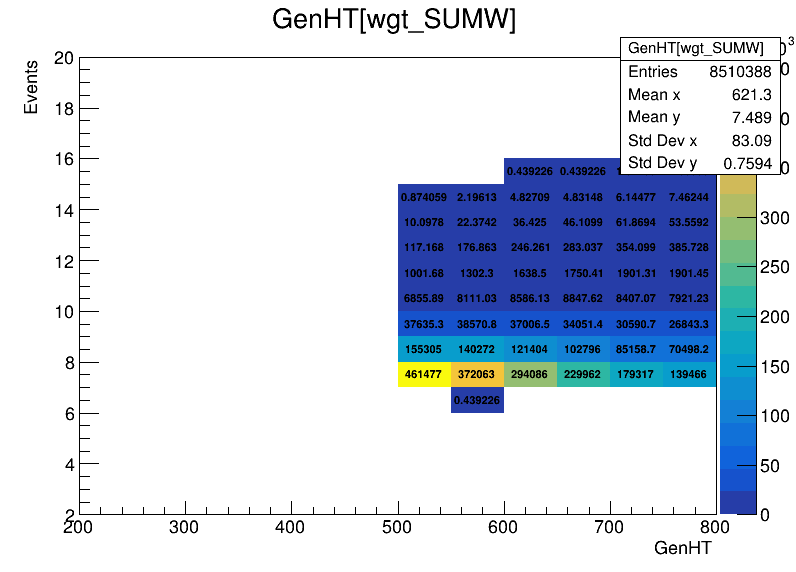

In [10]:
c = ROOT.TCanvas("c", "", 800, 600)
c.cd()
histos["tt_DL-GF"]["wgt_SUMW"]["GenHTvnGenJet"].Draw("COLZ TEXT")
#histos["tt_DL-GF"].Draw()
c.Draw()

In [15]:
%jsroot on
c = ROOT.TCanvas("c1", "", 800, 600)
c.cd()
copy = histos["tt_DL-GF"]["wgt_SUMW"]["nJet7HTgt500"].Clone()
copy.Scale(0.0166381)
copy.SetLineColor(ROOT.kRed)
copy.SetFillColor(ROOT.kRed)
copy.Draw("HIST")
histos["tt_DL"]["wgt_SUMW"]["nJet7HTgt500"].Draw("HIST SAME")
#histos["tt_DL-GF"].Draw()
c.Draw()
c2 = ROOT.TCanvas("c2", "", 800, 600)
c2.cd()
copy2 = histos["tt_DL-GF"]["wgt_SUMW"]["HT500to550nJet"].Clone()
copy2.Scale(0.0166381)
copy2.SetLineColor(ROOT.kRed)
copy2.SetFillColor(ROOT.kRed)
copy2.Draw("HIST")
histos["tt_DL"]["wgt_SUMW"]["HT500to550nJet"].Draw("HIST SAME")
#histos["tt_DL-GF"].Draw()
c2.Draw()
c3 = ROOT.TCanvas("c3", "", 800, 600)
c3.cd()
copy3 = histos["tt_SL-GF"]["wgt_SUMW"]["nJet9HTgt500"].Clone()
copy3.Scale(0.0338801)
copy3.SetLineColor(ROOT.kRed)
copy3.SetFillColor(ROOT.kRed)
copy3.Draw("HIST")
histos["tt_SL"]["wgt_SUMW"]["nJet9HTgt500"].Draw("HIST SAME")
#histos["tt_DL-GF"].Draw()
c3.Draw()
c4 = ROOT.TCanvas("c4", "", 800, 600)
c4.cd()
copy4 = histos["tt_SL-GF"]["wgt_SUMW"]["HT500to550nJet"].Clone()
copy4.Scale(0.0338801)
copy4.SetLineColor(ROOT.kRed)
copy4.SetFillColor(ROOT.kRed)
copy4.Draw("HIST")
histos["tt_SL"]["wgt_SUMW"]["HT500to550nJet"].Draw("HIST SAME")
#histos["tt_DL-GF"].Draw()
c4.Draw()

In [12]:
rootDict = {}
histDir = "stitchCalc_20200219_absOfGenJet_eta"
if not os.path.isdir(histDir):
    os.makedirs(histDir)
for name, name_val in histos.items():
    for variation, var_val in name_val.items():
        for hist_name, hist in var_val.items():
            type_hist = type(hist)
            print("{} {} {} {}".format(name, variation, hist_name, type_hist))
            dictKey = hist_name
            if dictKey not in rootDict:
                rootDict[dictKey] = ROOT.TFile.Open("{}.root"\
                                 .format(histDir + "/" + dictKey), "RECREATE")
            rootDict[dictKey].cd()
            hptr = hist.GetPtr()
            oldname = hptr.GetName()
            hptr.SetName("{}".format(name + "_" + variation))
            hptr.Write()
            hptr.SetName("{}".format(oldname)) #Avoid overwriting things by switching back, save from segfault
for f in rootDict.values():
    f.Close()

tt_SL-GF wgt_SUMW GenHT <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_SUMW nGenJet <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_SUMW GenHTvnGenJet <class 'ROOT.ROOT.RDF.RResultPtr<TH2D>'>
tt_SL-GF wgt_SUMW nJet7HTgt500 <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_SUMW nJet9HTgt500 <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_SUMW HT500to550nJet <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_SUMW nGenLep <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_NUMW GenHT <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_NUMW nGenJet <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_NUMW GenHTvnGenJet <class 'ROOT.ROOT.RDF.RResultPtr<TH2D>'>
tt_SL-GF wgt_NUMW nJet7HTgt500 <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_NUMW nJet9HTgt500 <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_NUMW HT500to550nJet <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_SL-GF wgt_NUMW nGenLep <class 'ROOT.ROOT.RDF.RResultPtr<TH1D>'>
tt_DL wgt_SUMW GenHT

In [13]:
print("Hello")
def computeRatioWithErrors(inFile, num, den, xValue, yValue=None):
    """Compute the ratio between two histograms in a root file, using the value of the x and y coordinates, returning tuple of (ratio, +error, -error).
    
    inFile should be a string specifying the string path to the root file containing the histograms.
    num should be a string specifying the key of the numerator histogram.
    den should be a string specifying the key of the denominator histogram.
    xValue should be the int/float value the desired bin covers.
    yValue optionally can be passed for 2D histograms.
    """
    f = ROOT.TFile.Open("{:s}".format(inFile))
    nhist = f.Get("{:s}".format(num))
    dhist = f.Get("{:s}".format(den))
    if yValue == None:
        xybin = nhist.FindBin(xValue)
        assert xybin == dhist.FindBin(xValue)
    else:
        xybin = nhist.FindBin(xValue, yValue)
        assert xybin == dhist.FindBin(xValue, yValue)
    #print(xybin)
    nmean = nhist.GetBinContent(xybin)
    dmean = dhist.GetBinContent(xybin)
    nerror = nhist.GetBinError(xybin)
    derror = dhist.GetBinError(xybin)
    rnominal = float(nmean)/float(dmean) 
    rup = float(nmean + nerror)/float(dmean - derror)
    rdown = float(nmean - nerror)/float(dmean + derror)
    return (rnominal, rup - rnominal, rdown - rnominal)

DL = computeRatioWithErrors("{}/GenHTvnGenJet.root".format(histDir), "tt_DL_wgt_SUMW", "tt_DL-GF_wgt_SUMW", 500.001, 7)
SL = computeRatioWithErrors("{}/GenHTvnGenJet.root".format(histDir), "tt_SL_wgt_SUMW", "tt_SL-GF_wgt_SUMW", 500.001, 9)
print(DL)
print(SL)
DLN = computeRatioWithErrors("{}/GenHTvnGenJet.root".format(histDir), "tt_DL_wgt_NUMW", "tt_DL-GF_wgt_NUMW", 500.001, 7)
SLN = computeRatioWithErrors("{}/GenHTvnGenJet.root".format(histDir), "tt_SL_wgt_NUMW", "tt_SL-GF_wgt_NUMW", 500.001, 9)
print(DLN)
print(SLN)
print(89.0482 * DL[0])
print(366.2073 * SL[0])

Hello
(0.016638146969107315, 6.066511875056982e-05, -6.054635688937729e-05)
(0.03388010994310041, 0.00018213448251695047, -0.0001817096770218643)
(0.016641473216258477, 6.0676996380980286e-05, -6.055821172503209e-05)
(0.03388863009916659, 0.0001821783813079278, -0.00018175347610803472)
1.48159703893
12.407143586
